# Python exercise

```txt
       video:  5
       title:  Python exercise
      author:  César Freire <cesar.freire@training.rumos.pt>
   reviewers:  Ana Felizardo, Paulo Martins
affiliations:  Rumos Formação
```


__In this episode__

* [What is "Número de identificação fiscal" aka NIF](#what-is-número-de-identificação-fiscal-aka-nif)
* [Verhoeff algorithm](#verhoeff-algorithm)
* [NIF Validator example](#nif-validator-example)

## What is "Número de identificação fiscal" aka NIF
https://pt.wikipedia.org/wiki/N%C3%BAmero_de_identifica%C3%A7%C3%A3o_fiscal

## Verhoeff algorithm
https://en.wikipedia.org/wiki/Verhoeff_algorithm

## NIF Validator example
RUMOS NIF: 502624558


        5   0   2   6   2   4   5   5   8 
        9   8   7   6   5   4   3   2   1 
        ----------------------------------
        45  0  14  36  10  16  15  10   8 = Sum(154) mod 11 == 0  


In [44]:
nif = '502624558'

total = 0
pos = 0
for digit in nif:
    mul = int(digit) * (9-pos)
    total = total + mul
    print(f'>>> {9-pos} x {int(digit)} = {mul:02} | {total=:003}') 
    pos = pos + 1

>>> 9 x 5 = 45 | total=045
>>> 8 x 0 = 00 | total=045
>>> 7 x 2 = 14 | total=059
>>> 6 x 6 = 36 | total=095
>>> 5 x 2 = 10 | total=105
>>> 4 x 4 = 16 | total=121
>>> 3 x 5 = 15 | total=136
>>> 2 x 5 = 10 | total=146
>>> 1 x 8 = 08 | total=154


In [2]:
total % 11 == 0

True

### Reduce code with lists

In [45]:
total = []
for pos, digit in enumerate(nif):
    total.append( int(digit) * (9-pos) )

sum(total) % 11 == 0

True

### Better with a list comprehension

In [46]:
total = [int(digit) * (9-pos) for pos, digit in enumerate(nif) ]

sum(total) % 11 == 0

True

### Move it to a function

- reuse
- simplicity
- testing

In [47]:
def validate_nif(nif: str) -> bool:
    """ Validates PT NIF number """
    total = [int(digit) * (9-pos) for pos, digit in enumerate(nif) ]
    return sum(total) % 11 == 0

In [48]:
validate_nif(nif='999999999') # False

False

In [49]:
validate_nif(nif='999999990') # True

True

## Improve with tests

In [50]:
import doctest

def validate_nif(nif: str) -> bool:
    """ Validates PT NIF number
    >>> valida_nif('999999990')
    True
    >>> valida_nif('999999999')
    False
    >>> valida_nif('502624558')
    True
    """

    return sum([int(digit) * (9-pos) for pos, digit in enumerate(nif) ]) % 11 == 0

doctest.testmod()

TestResults(failed=0, attempted=6)

### Improve parameters tests

In [9]:
import doctest

def validate_nif(nif: str) -> bool:
    """ Validates PT NIF with Luhn algorithm 
    >>> valida_nif('999999990')
    True
    >>> valida_nif('999999999')
    False
    >>> valida_nif('502624558')
    True
    >>> valida_nif('5O2624558')  # O not 0
    False
    """
    
    if not nif.isdigit() or len(nif) != 9:
        return False
    total = [int(digit) * (9-pos) for pos, digit in enumerate(nif) ]
    return sum(total) % 11 == 0

doctest.testmod()

TestResults(failed=0, attempted=4)

In [10]:
validate_nif('123456789')

True

## Do more testings

In [30]:
nif_file = 'nif_list_ok.txt'
nif_list = []
with open(nif_file) as file:
   for line in file:
        fields = line.strip().split()
        nif_list.append(fields)

nif_list

[['692558620',
  '695566222',
  '695565222',
  '695662226',
  '695660226',
  '695208229',
  '695256228',
  '695805228'],
 ['625005229',
  '695566202',
  '695565202',
  '695662206',
  '695660206',
  '695208209',
  '695256208',
  '695805208'],
 ['600560558',
  '695562680',
  '695565685',
  '695668680',
  '695666685',
  '695209682',
  '695252686',
  '695805686'],
 ['622565556',
  '695562660',
  '695565665',
  '695668660',
  '695666665',
  '695209662',
  '695252666',
  '695805666'],
 ['665026585',
  '695568655',
  '695566659',
  '695665658',
  '695662658',
  '695260652',
  '695258655',
  '695806650'],
 ['662809222',
  '695568625',
  '695566629',
  '695665628',
  '695662628',
  '695260622',
  '695258625',
  '695806620'],
 ['650065809',
  '695569608',
  '695562602',
  '695665602',
  '695668606',
  '695266606',
  '695259609',
  '695802608'],
 ['602895208',
  '695569582',
  '695562582',
  '695665586',
  '695668586',
  '695266580',
  '695259588',
  '695802588'],
 ['656980625',
  '695520068',
  

In [31]:
flat_list = [item for sublist in nif_list for item in sublist]
flat_list

['692558620',
 '695566222',
 '695565222',
 '695662226',
 '695660226',
 '695208229',
 '695256228',
 '695805228',
 '625005229',
 '695566202',
 '695565202',
 '695662206',
 '695660206',
 '695208209',
 '695256208',
 '695805208',
 '600560558',
 '695562680',
 '695565685',
 '695668680',
 '695666685',
 '695209682',
 '695252686',
 '695805686',
 '622565556',
 '695562660',
 '695565665',
 '695668660',
 '695666665',
 '695209662',
 '695252666',
 '695805666',
 '665026585',
 '695568655',
 '695566659',
 '695665658',
 '695662658',
 '695260652',
 '695258655',
 '695806650',
 '662809222',
 '695568625',
 '695566629',
 '695665628',
 '695662628',
 '695260622',
 '695258625',
 '695806620',
 '650065809',
 '695569608',
 '695562602',
 '695665602',
 '695668606',
 '695266606',
 '695259609',
 '695802608',
 '602895208',
 '695569582',
 '695562582',
 '695665586',
 '695668586',
 '695266580',
 '695259588',
 '695802588',
 '656980625',
 '695520068',
 '695568060',
 '695666065',
 '695665060',
 '695262065',
 '695260069',
 '6958

In [32]:
result = []
for nif in flat_list:
    result.append(validate_nif(nif))

result.count(True) / len(result) * 100

24.75

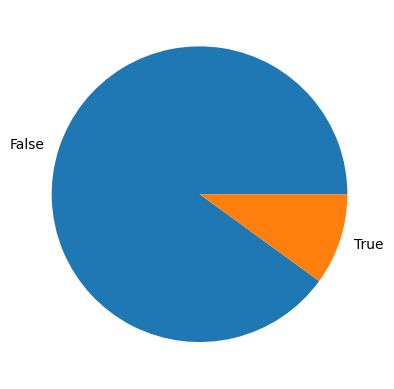

In [51]:
from matplotlib import pyplot as plt
data = [result.count(False), result.count(True)]
labels =  ['False', 'True']
plt.pie(x=data,labels=labels)
plt.title='Valida NIF results'
plt.show()

### Final solution

In [15]:
validate_nif('192453670')

False

In [40]:
import doctest

def valida_nif(nif: str) -> bool:
    """ Validates PT NIF number
    >>> valida_nif('999999990')
    True
    >>> valida_nif('999999999')
    False
    >>> valida_nif('192453670')
    True
    >>> valida_nif('5O2624558')  # O not 0
    False
    """
    
    if not nif.isdigit() or len(nif) != 9:
        return False
    
    check_digit = int(nif[-1])
    total = sum([int(digit) * (9-pos) for pos, digit in enumerate(nif) ])
    result = total % 11 == 0

    # Test if check digit is 10
    if result == False and nif[-1] == '0':
        result = True

    return result

doctest.testmod()

TestResults(failed=0, attempted=4)

In [22]:
valida_nif('192453670')

True

In [23]:
result = []
for nif in flat_list:
    result.append(valida_nif(nif))

result.count(True) / len(result) * 100

100.0

In [35]:
def validate_nif(nif: str) -> bool:
    """
    Validates a Portuguese tax identification number (NIF).
    
    :param nif: A string containing the NIF to be validated.
    :return: True if the NIF is valid, False otherwise.
    """
    if len(nif) != 9 or not nif.isdigit():
        return False
    
    first_digit = int(nif[0])
    
    # Valid first digits for individual, collective persons, and state organs
    if first_digit not in [1, 2, 3, 5, 6, 7, 8, 9]:
        return False
    
    check_digit = int(nif[-1])
    total = sum(int(digit) * (9 - idx) for idx, digit in enumerate(nif[:-1]))
    
    remainder = total % 11
    calculated_check_digit = 0 if remainder < 2 else 11 - remainder
    
    return check_digit == calculated_check_digit

# Example usage:
nif = "123456789"
if validate_nif(nif):
    print("The NIF is valid.")
else:
    print("The NIF is invalid.")


The NIF is valid.


In [36]:
result = []
nif_file = 'nif_list_ok.txt'
for nif in flat_list:
    result.append(validate_nif(nif))

result.count(True) / len(result) * 100

10.0

### Exemplo Prof. Jorge Picado

In [42]:
nif = '062350080'
valida_nif(nif)

True